#### 회귀
- 소득이 증가하면 소비도 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음
- 두 변수 사이에 일대일로 대응되는 확률적,통계적 상관성을 찾는 알고리즘을 Simple Linear Regression라고 함
- 변수 X,Y에 대한 정보를 가지고 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘

## 회귀 평가 지표
- MAE: 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE(mean squared error): 실제값과 오차값의 차이를 제곱해 평균한 것
- RMSE(route mean squared error): MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것을 보정)
- R square : 분산 기반으로 예측 성능을 평가, 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
- 1에 가까울수록 예측 정확도가 높음. 예측값 Variance / 실제값 Variance


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_excel('./dataset/auto-mpg.xlsx')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [8]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         398 non-null    float64
 1   cylinders   398 non-null    int64  
 2   horsepower  398 non-null    object 
 3   weight      398 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


In [9]:
ndf.horsepower.replace('?',np.nan,inplace=True)
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)
ndf.horsepower.unique()
ndf.horsepower.astype('float64')

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 392, dtype: float64

In [10]:
ndf.to_pickle('./dataset/auto-mpg.pkl')

In [11]:
X =ndf[['weight']]
y =ndf['mpg']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=11)


<AxesSubplot:xlabel='weight', ylabel='mpg'>

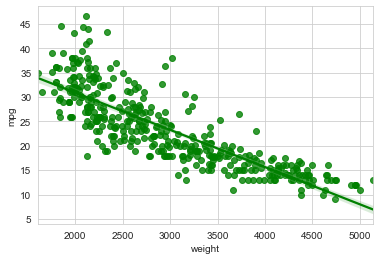

In [12]:
import seaborn as sns
sns.set_style('whitegrid')
sns.regplot(X,y,color='g')

In [13]:
#학습을 하면서 가ㅏㅈ ㅇ최적의 회귀선을 결정하는 것은 기울기

In [14]:
from sklearn.linear_model import LinearRegression 
lr =LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [15]:
#y_preds

In [16]:
# 기울기가 그렇게 작아보이진 않는데 엄청 작잖아-> mpg랑 weight단위가 달라서 그래서 스케일 해줘야됨
print('기울기:',lr.coef_)
print('절편:',lr.intercept_)

기울기: [-0.00762163]
절편: 45.97121770475769


In [17]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(mse)
print(rmse)
print(r_square)

22.168955157340807
4.70839199274453
0.6410608728212728


<AxesSubplot:xlabel='mpg', ylabel='Density'>

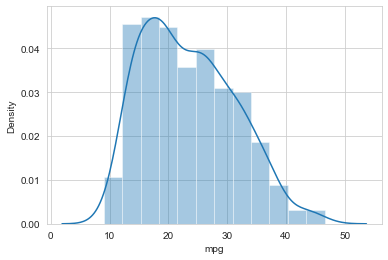

In [18]:
#종속변수의 그래프
sns.distplot(y,kde=True)

<AxesSubplot:ylabel='Density'>

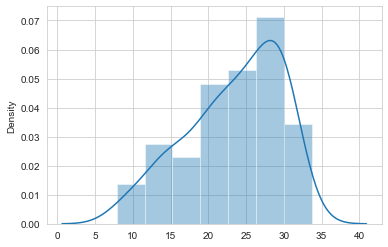

In [19]:
#실제 y값
sns.distplot(y_preds,kde=True)

<AxesSubplot:ylabel='Density'>

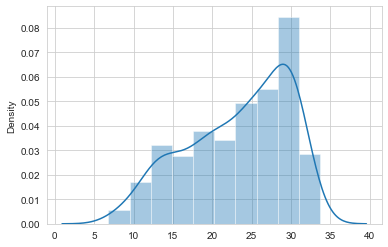

In [20]:
#전체 y예측값과 위의 실제값y 과의 차이를 보려고
y_hat = lr.predict(X)
sns.distplot(y_hat,kde=True)

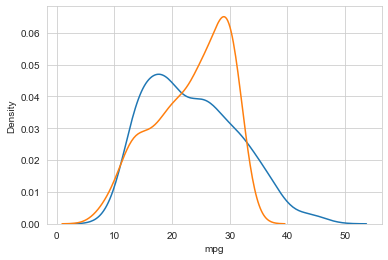

In [21]:
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')
plt.show()
#왼쪽은 과소적합, 오른쪽거는 과대적합 그래서 우리는 중간형태를 찾아가는 거에요

## 다항 회귀분석 
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항 함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
- 다항회귀도 선형회귀임. 선형/ 비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는  무관

In [22]:
X =ndf[['weight']]
y =ndf['mpg']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=11)

In [23]:
X_train[:3]

,weight
311,2120
106,4499
332,1845


In [24]:
#다항식 변환
from sklearn.preprocessing import PolynomialFeatures 

In [25]:
poly= PolynomialFeatures(degree=2)
#2인2차 다항식으로 변환
X_train_poly = poly.fit_transform(X_train)

print(X_train.shape)
print(X_train_poly.shape)
#절편,x자승? x제곱?

(274, 1)
(274, 3)


In [26]:
X_train_poly[:5]

array([[1.0000000e+00, 2.1200000e+03, 4.4944000e+06],
       [1.0000000e+00, 4.4990000e+03, 2.0241001e+07],
       [1.0000000e+00, 1.8450000e+03, 3.4040250e+06],
       [1.0000000e+00, 2.0450000e+03, 4.1820250e+06],
       [1.0000000e+00, 1.9850000e+03, 3.9402250e+06]])

In [27]:
#차수확인
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [28]:
pr = LinearRegression()
pr.fit(X_train_poly,y_train)
X_test_poly = poly.fit_transform(X_test)
#1번째방식
# r_square = r2_score(y_test,y_preds) <-예측값
#2번째 방식
r_square = pr.score(X_test_poly,y_test)# <-자체 가지고 한 것
r_square

0.6368479947376219

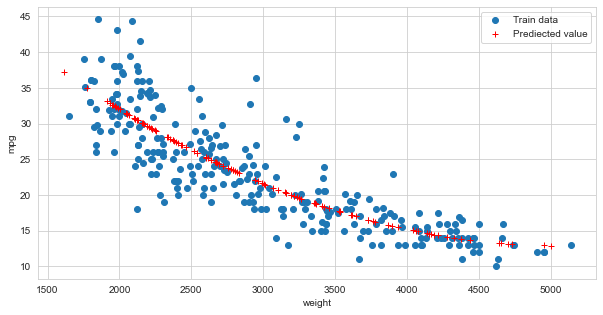

In [29]:
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train data')
ax.plot(X_test,y_hat_test,'r+',label='Prediected value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

In [30]:
X =ndf[['weight']]
y =ndf['mpg']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=11)
from sklearn.preprocessing import PolynomialFeatures 
poly= PolynomialFeatures(degree=2)
#2인2차 다항식으로 변환
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

y_hat_test = pr.predict(X_test_poly)


In [31]:
# [과제] X 데이터를 X_poly 데이터셋으로 변환하여 2차함수로 만들어진 데이터셋을 예측하고 시각화하세요
import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=11)

In [32]:
#2인2차 다항식으로 변환
poly= PolynomialFeatures(degree=2)
X_poly_train= poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# 학습
lr = LinearRegression()
lr.fit(X_poly_train,y_train)
y_preds = lr.predict(X_test_poly)
#1번째방식
# r_square = r2_score(y_test,y_preds) <-예측값
#2번째 방식
r_square = pr.score(X_test_poly,y_test)# <-자체 가지고 한 것
r_square

-1202.8523313480403

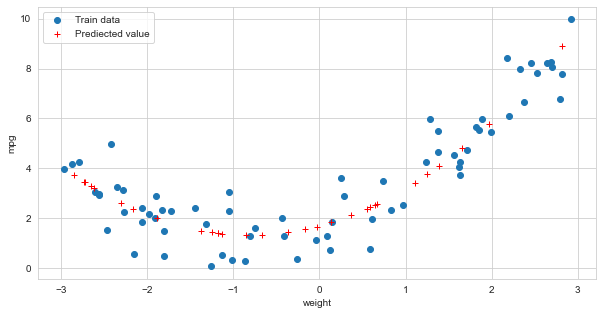

In [33]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train data')
ax.plot(X_test,y_preds,'r+',label='Prediected value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

### 다중 회귀분석
- 여러 개의 독립변수가 종속변수에 영향을 주고 선형관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성

In [34]:
df= pd.read_pickle('./dataset/auto-mpg.pkl')
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [35]:
df.horsepower[df.horsepower == '?'] = np.nan # NAN 으로 값 변경
df.dropna(subset=['horsepower'],axis=0,inplace=True)
df.horsepower = df.horsepower.astype('float') # float로 type 변경
df.horsepower.unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [36]:
X = df.drop('mpg',axis=1)
y =df['mpg']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
r_square

0.6939048496695598

In [37]:
# Q. mse, rmse, r_square(r2_score) 기울기, 절편
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(mse)
print(rmse)
print(r_square)
print(f' 기울기: {lr.coef_}')
print(f' 절편: {lr.intercept_}')

17.330085628989952
4.162941943985041
0.6939048496695598
 기울기: [-0.60691288 -0.03714088 -0.00522268]
 절편: 46.41435126963404


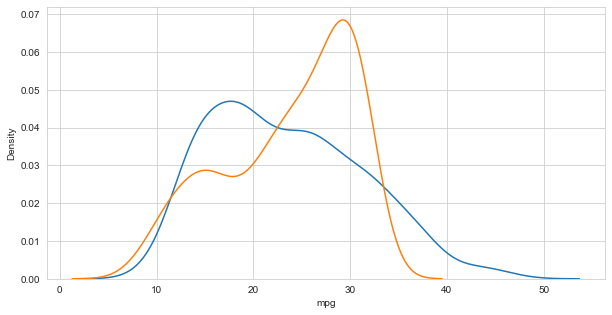

In [38]:
# [과제] y_test, y_hat 을 하나의 그래프로 비교하여 시각화
y_hat= lr.predict(X) #전체값
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')
plt.show()
plt.close()

In [39]:
#[과제] 아래 Boston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요.

In [40]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

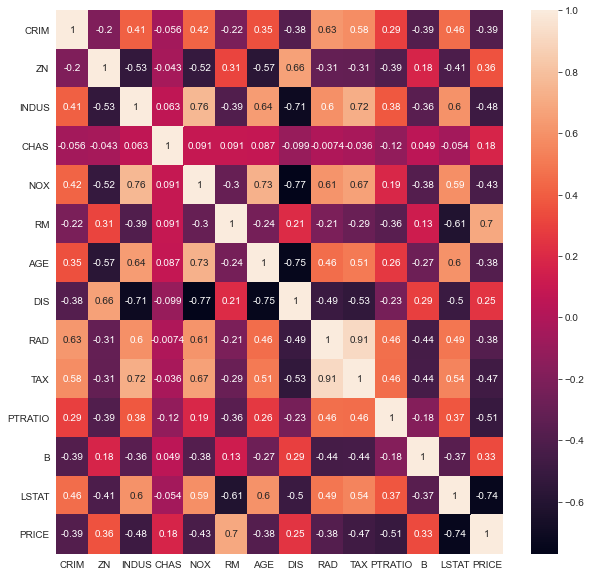

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(boston_df.corr(),annot=True)

In [60]:
boston_df.corr()[['PRICE']]

,PRICE
CRIM,-0.388305
ZN,0.360445
INDUS,-0.483725
CHAS,0.175260
NOX,-0.427321
RM,0.695360
AGE,-0.376955
DIS,0.249929
RAD,-0.381626
TAX,-0.468536


In [41]:
y = boston_df['PRICE']
X= boston_df.drop('PRICE',axis=1,inplace=False)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=156)

In [42]:
#선형회귀로 학습
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse =np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print('mse:',mse)
print('rmse:',rmse)
print('r_square:',r_square,'\n')
print(f' 기울기: {lr.coef_}')
print(f' 절편: {lr.intercept_}')


mse: 17.296915907902164
rmse: 4.158956107955717
r_square: 0.7572263323138919 

 기울기: [-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]
 절편: 40.99559517216454


In [ ]:
#기울기가 음수인 이유 회귀는 mse 오차값이 적은 게 좋아서 NEG_MEAN_sqaure함수를 써서 -1을 곱해서 값 반환
#
from sklearn.model_selection import cross_val_score

neg_mse_score = cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)

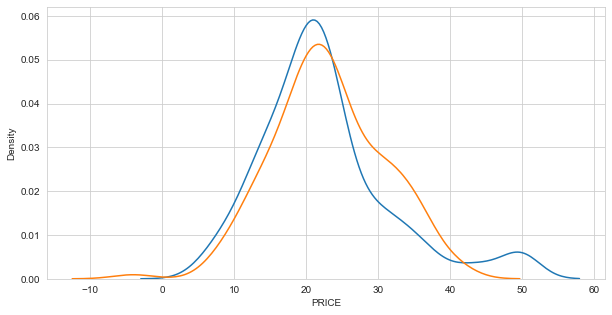

In [43]:
#실제값과 예측값의 차이
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_preds,hist=False,label='y_hat')
plt.show()
plt.close()

[도전과제]
아래는 백화점 고객의 1년 간 구매 데이터이다.

(가) 제공 데이터 목록
- y_train.csv : 고객의 성별 데이터 (학습용), CSV 형식의 파일
- X_train.csv, X_test.csv : 고객의 상품구매 속성 (학습용 및 평가용), CSV 형식의 파일

(나) 데이터 형식 및 내용
- y_train.csv (3,500명 데이터)
- X_train.csv (3,500명 데이터), X_test.csv (2,482명 데이터)

고객 3,500명에 대한 학습용 데이터(y_train.csv, X_train.csv)를 이용하여 성별예측 모형을 만든 후, 이를 평가용 데이터(X_test.csv)에 적용하여 얻은 2,482명 고객의 성별 예측값(남자일 확률)을 다음과 같은 형식의 CSV 파일로 생성하시오.(제출한 모델의 성능은 ROC-AUC 평가지표에 따라 채점)

custid,gender
3500,0.267
3501,0.578
3502,0.885
․ ․ ․


성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, Feature Engineering, 분류 알고리즘 사용, 초매개변수 최적화, 모형 앙상블 등이 수반되어야 한다

In [44]:
X_train = pd.read_csv('./dataset/X_train.csv',encoding='CP949')
X_train.head()
X_test = pd.read_csv('./dataset/X_test.csv',encoding='CP949')
X_test.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26
1,3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3
2,3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3
3,3503,7594080,5225000,NaN,주방용품,부산본점,5,2.000000,0.000000,47
4,3504,1795790,1411200,NaN,수산품,청량리점,3,2.666667,0.125000,8


In [45]:
y_train = pd.read_csv('./dataset/y_train.csv',encoding='CP949')
y_train.head()

,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0


In [46]:
X_train = X_train.iloc[:,1:]
X_test = X_test.iloc[:,1:]
y_train = y_train.iloc[:,-1]

In [47]:
X_train.isnull().sum()
#환불금액-3906개의 null값
X_train.환불금액.replace(np.NaN,0,inplace=True)
X_train.isnull().sum()

총구매액       0
최대구매액      0
환불금액       0
주구매상품      0
주구매지점      0
내점일수       0
내점당구매건수    0
주말방문비율     0
구매주기       0
dtype: int64

In [48]:
X_test.환불금액.replace(np.NaN,0,inplace=True)
X_test.isnull().sum()

총구매액       0
최대구매액      0
환불금액       0
주구매상품      0
주구매지점      0
내점일수       0
내점당구매건수    0
주말방문비율     0
구매주기       0
dtype: int64

In [49]:
X_train.shape

(3500, 9)

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
X_train.loc[:,['주구매상품','주구매지점']]=X_train.loc[:,['주구매상품','주구매지점']].apply(LabelEncoder().fit_transform)
X_train


,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,68282840,11264000,6860000.0,5,0,19,3.894737,0.527027,17
1,2136000,2136000,300000.0,21,19,2,1.500000,0.000000,1
2,3197000,1639000,0.0,6,1,2,2.000000,0.000000,1
3,16077620,4935000,0.0,5,2,18,2.444444,0.318182,16
4,29050000,24000000,0.0,15,8,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,0.0,3,8,1,2.000000,1.000000,0
3496,29628600,7200000,6049600.0,22,9,8,1.625000,0.461538,40
3497,75000,75000,0.0,32,21,1,1.000000,0.000000,0
3498,1875000,1000000,0.0,41,8,2,1.000000,0.000000,39


In [51]:
X_test.loc[:,['주구매상품','주구매지점']]=X_test.loc[:,['주구매상품','주구매지점']].apply(LabelEncoder().fit_transform)
X_test

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,70900400,22000000,4050000.0,3,9,13,1.461538,0.789474,26
1,310533100,38558000,48034700.0,9,19,90,2.433333,0.369863,3
2,305264140,14825000,30521000.0,0,8,101,14.623762,0.083277,3
3,7594080,5225000,0.0,31,9,5,2.000000,0.000000,47
4,1795790,1411200,0.0,19,22,3,2.666667,0.125000,8
...,...,...,...,...,...,...,...,...,...
2477,82581500,23976000,0.0,3,9,8,1.750000,0.642857,40
2478,480000,480000,0.0,17,2,1,1.000000,0.000000,0
2479,260003790,25750000,0.0,6,8,19,3.736842,0.915493,18
2480,88991520,18120000,0.0,26,8,5,3.600000,0.444444,60


In [52]:
from sklearn.preprocessing import StandardScaler

sacler = StandardScaler()
x_sl =sacler.fit_transform(X_train)
x_t_sl =sacler.fit_transform(X_test)

In [62]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
#     roc_auc = roc_auc_score(y_test,pred_proba)
    print(f'오차행렬: \n {confusion}')
    print(f'정확도: {round(accuracy,4)}, 정밀도: {round(precision,4)}, 재현율: {round(recall,4)}')
    

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:,1]
# get_clf_eval(y_test,pred)
#회귀분류에서 잘 헀는지 정확도 점수? ( 분류에서 accuracy score)
print(lr.score(X_train,y_train))
# accuracy_score(y_test,pred)
# roc = roc_auc_score(y_test,pred_proba)
# roc

cust_id = y_train.iloc[0]
#이렇게 해야될 거 같은데 에러남
# cust_id = y_train.iloc[:,0]
result = pd.DataFrame({'cust_id':cust_id,'gender':pred_proba})
result

0.624


,cust_id,gender
0,0,0.425232
1,0,0.198986
2,0,0.238942
3,0,0.490611
4,0,0.497643
...,...,...
2477,0,0.423941
2478,0,0.499290
2479,0,0.307654
2480,0,0.423974


In [ ]:
# 재현율 정밀도의 경우에는 분모에 TP+FP P라고예측한 거에서 맞는거고
재현율은 분모가 실제가 P인거 중에서 맞춘 거
R2 스퀘어 뭐가 과제야


In [61]:
from sklearn.datasets import load_boston
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
X_data = boston_df.drop(['PRICE'],axis=1,inplace=False)
y_target = boston_df['PRICE']

<AxesSubplot:>

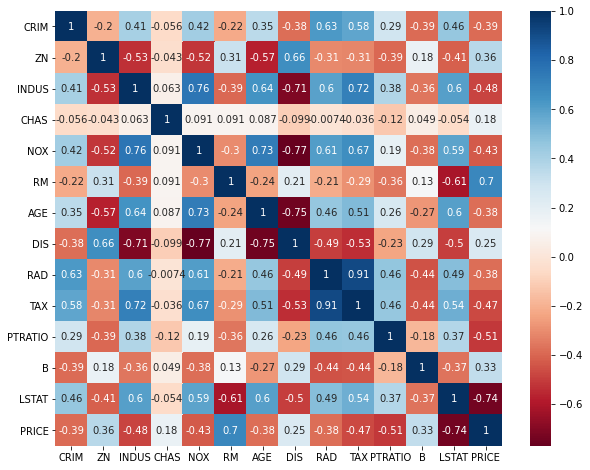

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(boston_df.corr(),cmap='RdBu',annot=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

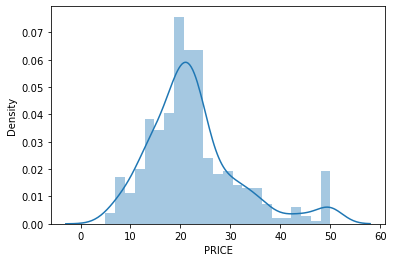

In [7]:
sns.distplot(boston_df.PRICE)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

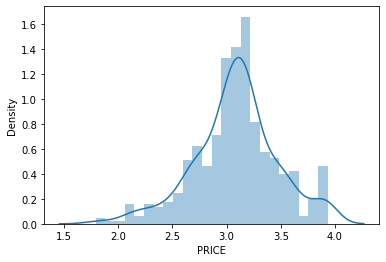

In [9]:
import numpy as np
y_log = np.log1p(boston_df['PRICE'])
sns.distplot(y_log)

In [27]:
#변수 선택 및 로그 변환 후 모델링 및 평가 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
X= boston_df[['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']]
y = boston_df['PRICE']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=1)
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

mse = mean_squared_error(y_test,pred)
rmse =np.sqrt(mse)
r2 =r2_score(y_test,pred)
print('mse: {0} ,rmse: {1}, r2: {2}'.format(mse,rmse,r2))
print('기울기',np.round(lr.coef_,1))
print(f'절편,{lr.intercept_:.3f}')

mse: 25.933977232124242 ,rmse: 5.092541333374157, r2: 0.717046289252381
기울기 [  3.2  -0.    0.1 -14.7   0.   -1.2  -0.6   0.1]
절편,36.903


#### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함(최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 비용함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀


In [28]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge =Ridge(alpha=10)
neg_mse_score = cross_val_score(ridge,X,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_score)
avg_rmse = np.mean(rmse_scores)
print(f'rmse scores:{np.round(rmse_scores,3)}')
print(f'평균 rmse:{avg_rmse:.3f}')

rmse scores:[3.216 5.405 6.227 9.091 5.8  ]
평균 rmse:5.948


In [40]:
from sklearn.model_selection import cross_val_score

# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))


alpha 0 일 때 5 folds 의 평균 RMSE : 6.051 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 6.044 
alpha 1 일 때 5 folds 의 평균 RMSE : 6.013 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.948 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.811 


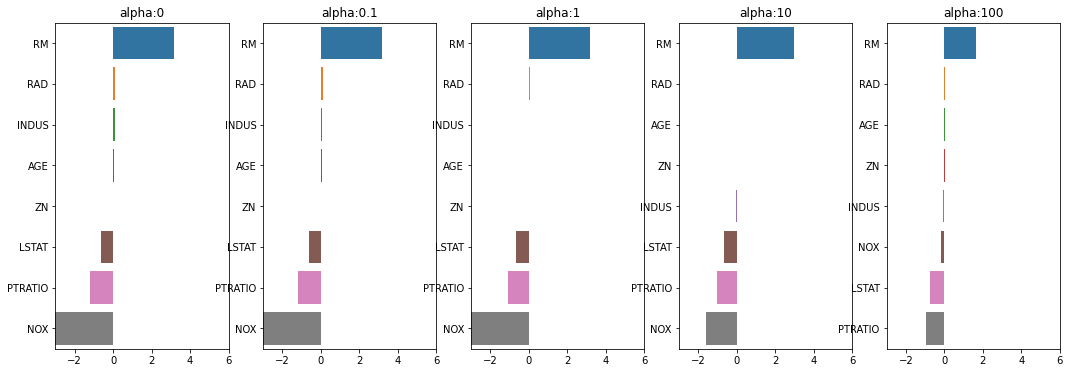

In [42]:
#Q. 상기의 경우 aplha값이 증가하면 회귀계수가 지속적으로 작아지는 것을 시각화하여 설명하세요
fig,axs = plt.subplots(figsize=(18,6),nrows=1,ncols=5)
coeff_df = pd.DataFrame()
for pos,alpha in enumerate(alphas):
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    coeff = pd.Series(data=ridge.coef_,index=X_train.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] =coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values,y=coeff.index,ax=axs[pos])
plt.show()

[과제] 모델이름과 alpha 리스트를 대입하면 각 alpha값 별로 rmse를 구해주는 사용자 함수를 작성하여 아래를 수행하세요  
  
- lasso_alphas=[0.07,0.1,0.5,1,3]
- elasticnet= [0.07,0.1,0.5,1.3]


In [53]:
from sklearn.linear_model import Lasso,ElasticNet

def get_linear_reg_eval(model_name,params=None,X=None,y=None,verbose=True,return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####',model_name,'####')
    for param in params:
        if model_name =='Ridge': model =Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name =='ElasticNet' :model = ElasticNet(alpha=param,l1_ratio=0.7)
        neg_mse_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_score))
        print('alpha 일 때 5폴드 평균 :',param,avg_rmse)
        model.fit(X_train,y_train)
        if return_coeff:
            coeff = pd.Series(data=model.coef_,index=X.columns)
            colname='alpha:'+str(param)
            coeff_df[colname]=coeff
    return coeff_df

In [54]:
lasso_alphas=[0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas,X=X,y=y)

#### Lasso ####
alpha 일 때 5폴드 평균 : 0.07 5.9984791870743575
alpha 일 때 5폴드 평균 : 0.1 5.99906784241811
alpha 일 때 5폴드 평균 : 0.5 6.053696362756871
alpha 일 때 5폴드 평균 : 1 6.0845483675678835
alpha 일 때 5폴드 평균 : 3 6.157059466432321


In [59]:
sort_columns='alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_columns,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.090039,2.993979,1.713157,0.112097,0.000000
RAD,0.033211,0.032759,0.026730,0.019207,-0.000000
AGE,0.016710,0.017141,0.022883,0.030055,0.018153
ZN,0.005414,0.006099,0.015231,0.026639,0.039325
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
INDUS,-0.025640,-0.025324,-0.021110,-0.015858,-0.000000
LSTAT,-0.665635,-0.671212,-0.745567,-0.838506,-0.817832
PTRATIO,-0.965857,-0.961263,-0.900047,-0.823583,-0.303929


In [55]:
ela_params= [0.07,0.1,0.5,1.3]
coeff_ela_df = get_linear_reg_eval('ElasticNet',params=ela_params,X=X,y=y)

#### ElasticNet ####
alpha 일 때 5폴드 평균 : 0.07 5.954818979648271
alpha 일 때 5폴드 평균 : 0.1 5.940300873749739
alpha 일 때 5폴드 평균 : 0.5 5.896019451283498
alpha 일 때 5폴드 평균 : 1.3 5.971205187241192


In [60]:
sort_columns='alpha:'+str(ela_params[0])
coeff_ela_df.sort_values(by=sort_columns,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.3
RM,2.930459,2.783849,1.433409,0.217547
RAD,0.036779,0.037135,0.036505,0.013617
AGE,0.017940,0.018650,0.025615,0.030047
ZN,0.005997,0.006923,0.016213,0.028219
INDUS,-0.028485,-0.029937,-0.033841,-0.022083
NOX,-0.079243,-0.000000,-0.000000,-0.000000
LSTAT,-0.675804,-0.684751,-0.764022,-0.826960
PTRATIO,-0.975942,-0.973182,-0.920440,-0.755085
